Langkah 1: Membuka Google Colab dan Mengunggah Dataset

In [ ]:
# Mengimpor pustaka 'files' dari Google Colab untuk mengunggah file
from google.colab import files
import pandas as pd
import io

# Kode ini akan memunculkan tombol 'Choose Files'
print("Silakan klik tombol 'Choose Files' di bawah dan pilih file CSV dataset gym Anda.")
uploaded = files.upload()

# Setelah diunggah, kode ini akan membaca file CSV tersebut
# dan menyimpannya dalam sebuah variabel bernama 'df' (singkatan dari DataFrame)
file_name = next(iter(uploaded))
df = pd.read_csv(io.BytesIO(uploaded[file_name]))

# Pesan konfirmasi bahwa dataset sudah siap digunakan
print(f"\n✅ Berhasil! Dataset '{file_name}' sudah dimuat dan siap dianalisis.")

Silakan klik tombol 'Choose Files' di bawah dan pilih file CSV dataset gym Anda.


Saving gym_members_exercise_tracking.csv to gym_members_exercise_tracking.csv

✅ Berhasil! Dataset 'gym_members_exercise_tracking.csv' sudah dimuat dan siap dianalisis.


Langkah 2: Instalasi Pustaka (Library) yang Dibutuhkan

In [ ]:
# Perintah 'pip install' adalah cara untuk memasang pustaka Python
# Opsi '--quiet' agar proses instalasi tidak terlalu ramai di layar

# Pustaka untuk AI dari Hugging Face
# - transformers: Pustaka utama untuk memuat dan menggunakan model AI.
# - torch & accelerate: Pustaka pendukung untuk komputasi AI.
# - bitsandbytes: Untuk membuat model AI yang besar jadi lebih ringan agar muat di Colab.
!pip install transformers torch accelerate bitsandbytes --quiet

# Pustaka untuk analisis dan visualisasi data
# - pandas: Untuk bekerja dengan data tabel (seperti CSV).
# - matplotlib & seaborn: Untuk membuat grafik dan plot yang bagus.
!pip install pandas matplotlib seaborn --quiet

print("install selesai")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 102.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 74.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 83.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.3/61.3 MB 10.9 MB/s eta 0:00:00
install selesai


Langkah 3: Memeriksa Data

In [ ]:
# Mengimpor pustaka yang akan sering kita gunakan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur agar grafik yang kita buat nanti terlihat bagus
sns.set_style("whitegrid")

# Menampilkan 5 baris pertama dari data Anda
# Ini cara cepat untuk melihat contoh isi dan nama-nama kolom
print("Berikut adalah 5 baris pertama dari dataset Anda:")
display(df.head())

# Menampilkan informasi teknis tentang dataset
# - Daftar kolom, jumlah data yang tidak kosong, dan tipe datanya (angka, teks, dll.)
# Ini penting untuk mendeteksi jika ada data yang hilang (missing values).
print("\nBerikut adalah informasi teknis dataset:")
df.info()

Berikut adalah 5 baris pertama dari dataset Anda:


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39



Berikut adalah informasi teknis dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_

Langkah 4: Analisis Data Eksplorasi (Mencari Pola Awal)

Melihat jenis latihan apa yang paling populer

/tmp/ipython-input-2604462781.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Workout_Type', order=df['Workout_Type'].value_counts().index, palette='viridis')


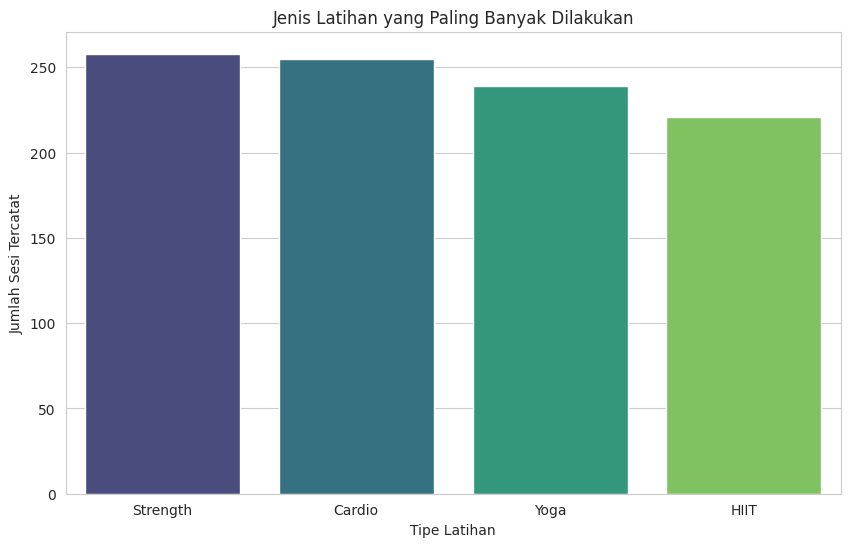

In [ ]:
# Membuat sebuah area gambar berukuran 10x6 inch
plt.figure(figsize=(10, 6))

# Menggunakan pustaka seaborn untuk membuat grafik hitung (countplot)
# Grafik ini akan menghitung berapa kali setiap nilai unik di kolom 'Workout_Type' muncul
sns.countplot(data=df, x='Workout_Type', order=df['Workout_Type'].value_counts().index, palette='viridis')

# Memberi judul dan label pada grafik agar mudah dibaca
plt.title('Jenis Latihan yang Paling Banyak Dilakukan')
plt.xlabel('Tipe Latihan')
plt.ylabel('Jumlah Sesi Tercatat')

# Menampilkan grafik ke layar
plt.show()

Melihat hubungan antara durasi latihan dan kalori yang terbakar:

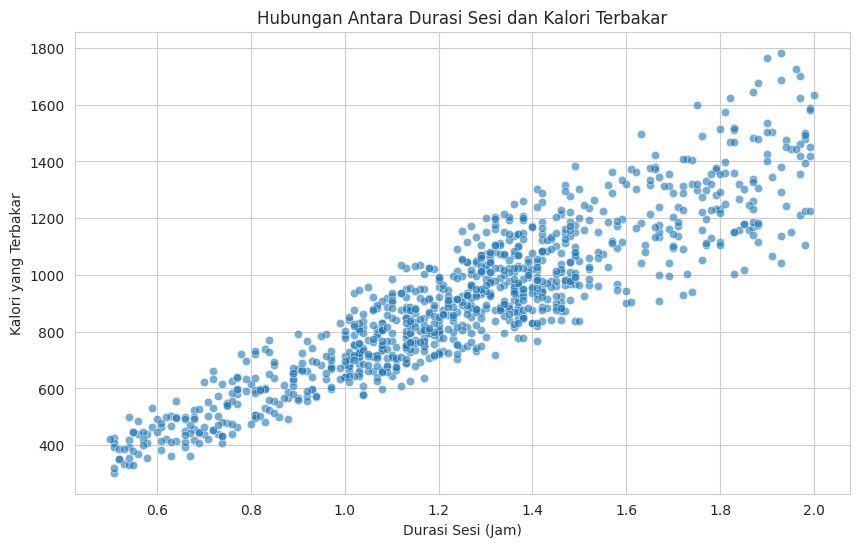

In [ ]:
# Membuat area gambar baru
plt.figure(figsize=(10, 6))

# Membuat grafik sebar (scatterplot) untuk melihat hubungan dua variabel numerik
# Sumbu x: Durasi Sesi, Sumbu y: Kalori Terbakar
sns.scatterplot(data=df, x='Session_Duration (hours)', y='Calories_Burned', alpha=0.6)

# Memberi judul dan label
plt.title('Hubungan Antara Durasi Sesi dan Kalori Terbakar')
plt.xlabel('Durasi Sesi (Jam)')
plt.ylabel('Kalori yang Terbakar')

# Menampilkan grafik
plt.show()

Langkah 5: Analisis Mendalam (Membandingkan Antar Tingkat Pengalaman)

/tmp/ipython-input-535166808.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Experience_Level', y='Calories_Burned', palette='magma')


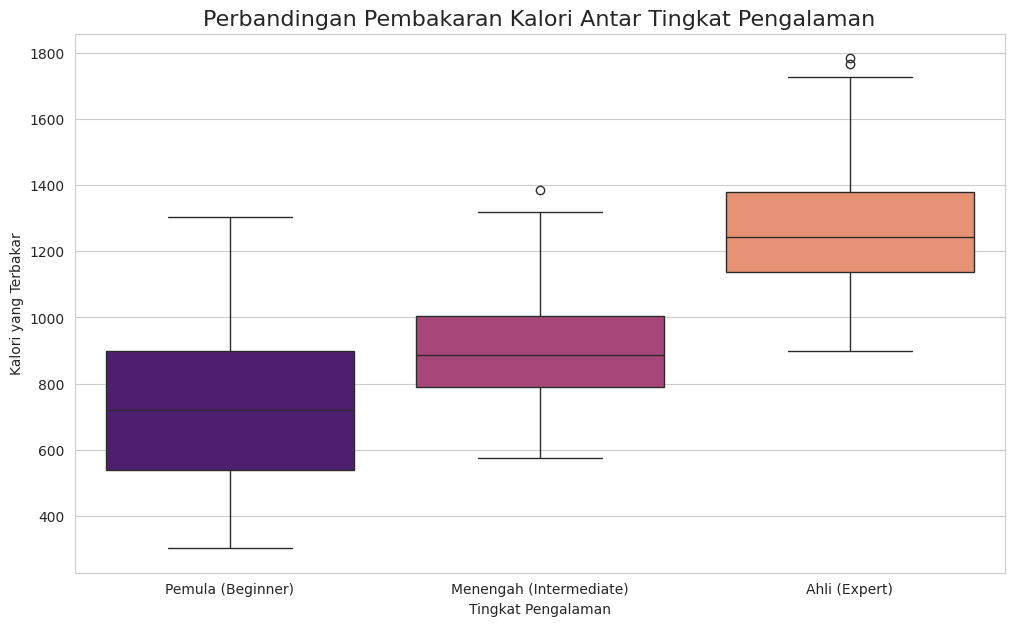

In [ ]:
# Membuat grafik boxplot untuk membandingkan distribusi data antar kategori
# Boxplot sangat bagus untuk melihat median, jangkauan, dan pencilan (outlier)
plt.figure(figsize=(12, 7))
sns.boxplot(data=df, x='Experience_Level', y='Calories_Burned', palette='magma')

# Memberi judul dan label
plt.title('Perbandingan Pembakaran Kalori Antar Tingkat Pengalaman', fontsize=16)
plt.xlabel('Tingkat Pengalaman')
plt.ylabel('Kalori yang Terbakar')

# Mengganti label angka (1, 2, 3) di sumbu x menjadi teks agar lebih deskriptif
plt.xticks([0, 1, 2], ['Pemula (Beginner)', 'Menengah (Intermediate)', 'Ahli (Expert)'])

# Menampilkan grafik
plt.show()

Analisis Efisiensi dan Durasi Latihan, Calories_per_Hour.

In [ ]:
# Membuat kolom baru 'Calories_per_Hour'
# Caranya adalah membagi total kalori terbakar dengan durasi sesi dalam jam
df['Calories_per_Hour'] = df['Calories_Burned'] / df['Session_Duration (hours)']

# Menampilkan 5 baris pertama untuk memastikan kolom baru sudah terbuat
print("Dataset dengan kolom baru 'Calories_per_Hour':")
display(df.head())

Dataset dengan kolom baru 'Calories_per_Hour':


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Calories_per_Hour
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20,776.923077
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00,679.230769
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71,609.909910
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41,901.694915
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39,868.750000


 Analisis Efisiensi Berdasarkan Jenis Latihan

/tmp/ipython-input-2017241242.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


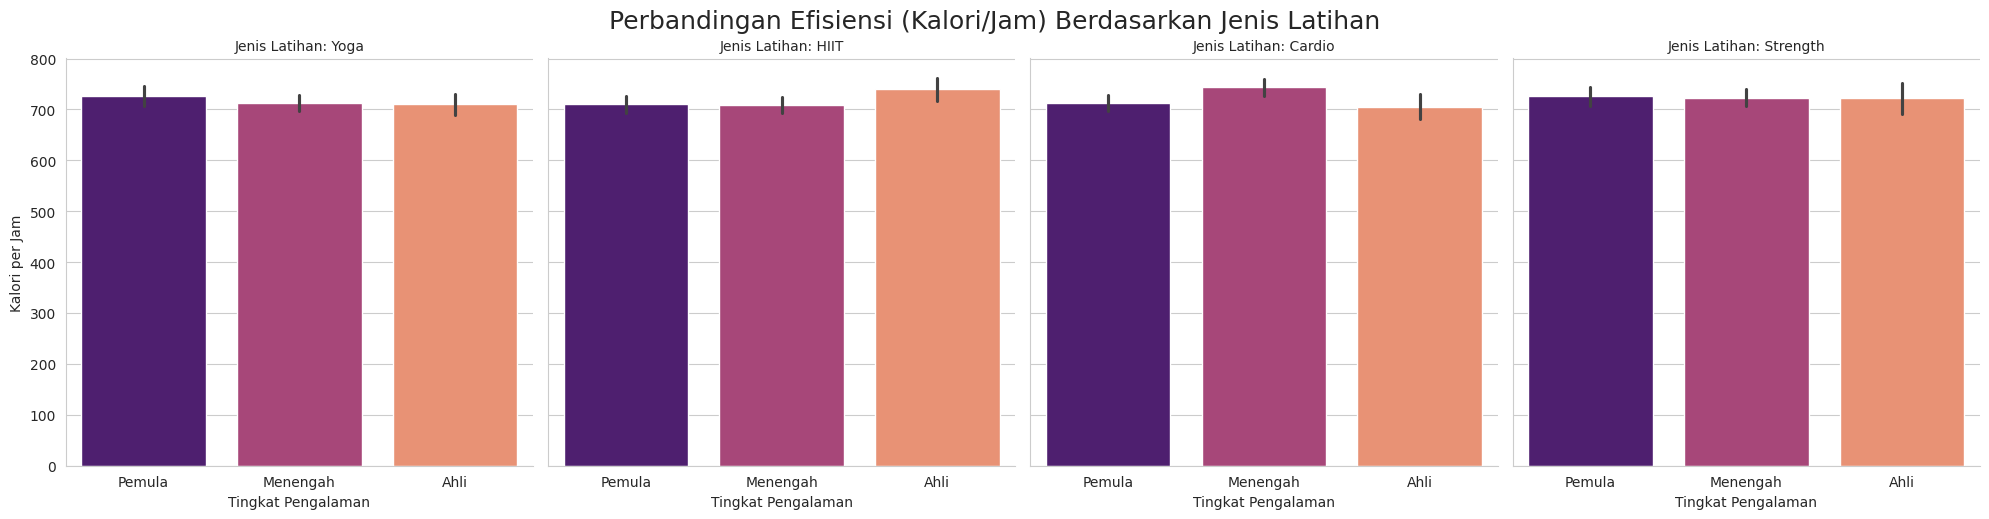

In [ ]:
# Menggunakan catplot untuk membuat beberapa grafik berdasarkan kategori
# x: Tingkat Pengalaman, y: Kalori per Jam, col: Jenis Latihan
# Ini akan membuat satu grafik untuk setiap 'Workout_Type'
g = sns.catplot(
    data=df,
    x='Experience_Level',
    y='Calories_per_Hour',
    col='Workout_Type',
    kind='bar', # Jenis plotnya adalah bar plot
    palette='magma',
    height=5,
    aspect=1
)

# Memberi judul dan label yang lebih jelas
g.fig.suptitle('Perbandingan Efisiensi (Kalori/Jam) Berdasarkan Jenis Latihan', y=1.03, fontsize=18)
g.set_axis_labels("Tingkat Pengalaman", "Kalori per Jam")
g.set_xticklabels(['Pemula', 'Menengah', 'Ahli'])
g.set_titles("Jenis Latihan: {col_name}")

plt.show()

In [ ]:
import requests
import json

# --- KONFIGURASI ---
# 1. Ganti teks di bawah ini dengan API Token Anda dari Hugging Face.
HF_API_TOKEN = "saya_sensor"

# Alamat API untuk model IBM Granite
API_URL = "https://huggingface.co/ibm-granite/granite-3.3-8b-instruct"

# --- FUNGSI UNTUK MENGHUBUNGI AI (DENGAN PENANGANAN ERROR) ---
def query_ai(prompt):
    """Fungsi untuk mengirim prompt ke API Hugging Face dan menerima jawaban."""

    headers = {"Authorization": f"Bearer {HF_API_TOKEN}"}
    payload = {
        "inputs": prompt,
        "parameters": {"max_new_tokens": 512, "return_full_text": False}
    }

    print("Mengirim permintaan ke server AI...")
    response = requests.post(API_URL, headers=headers, json=payload)

    # Mencoba membaca jawaban, jika gagal akan memberi tahu apa masalahnya
    try:
        print("Permintaan berhasil, memproses jawaban...")
        return response.json()[0]['generated_text']
    except requests.exceptions.JSONDecodeError:
        print("\n---!!! TERJADI ERROR SAAT MEMPROSES JAWABAN !!!---")
        print(f"Status Kode dari Server: {response.status_code}")
        print("Ini adalah balasan mentah dari server yang menyebabkan error:")
        print(f"==> {response.text} <==") # Ini akan menunjukkan pesan error sebenarnya
        return "Gagal mendapatkan jawaban dari AI. Periksa pesan error di atas."

# ---- MEMBUAT PROMPT ANDA ----

# 2. Rangkum temuan dari analisis grafik Anda di sini.
data_summary = """
Hasil analisis data gym menunjukkan:
1. Efisiensi pembakaran kalori (kalori per jam) anggota Ahli (Expert) jauh lebih tinggi saat melakukan latihan HIIT dibandingkan Pemula.
2. Untuk latihan Yoga dan Strength, efisiensi pembakaran kalori cenderung merata di semua tingkat pengalaman.
3. Durasi sesi latihan para ahli tidak jauh berbeda dengan tingkat lainnya, ini mengindikasikan mereka mencapai hasil lebih baik karena intensitas, bukan durasi.
"""

# 3. Prompt lengkap yang akan dikirim ke AI.
prompt_untuk_ai = f"""
<|user|>
Anda adalah seorang analis data ahli di industri kebugaran.
Berdasarkan rangkuman data berikut, berikan dua (2) insight bisnis yang tajam dan unik.
Jelaskan 'mengapa' di balik setiap pola secara logis.

Rangkuman Data:
{data_summary}

Format jawaban Anda sebagai:
**Insight 1:** [Deskripsi Insight Anda]
**Penjelasan Logis:** [Penjelasan Anda]

**Insight 2:** [Deskripsi Insight Anda]
**Penjelasan Logis:** [Penjelasan Anda]
<|assistant|>
"""

# ---- MEMANGGIL AI DAN MENAMPILKAN HASIL ----
print("Memulai proses untuk menghubungi IBM Granite...")
ai_insights = query_ai(prompt_untuk_ai)

print("\n\n--- HASIL ANALISIS DARI AI ---")
print(ai_insights.strip())

Memulai proses untuk menghubungi AI...
Mengirim permintaan ke server AI...
Permintaan berhasil, memproses jawaban...

---!!! TERJADI ERROR SAAT MEMPROSES JAWABAN !!!---
Status Kode dari Server: 404
Ini adalah balasan mentah dari server yang menyebabkan error:
==> Not Found <==


--- HASIL ANALISIS DARI AI ---
Gagal mendapatkan jawaban dari AI. Periksa pesan error di atas.


In [ ]:
# Mengimpor pustaka yang diperlukan untuk menjalankan model AI
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline
import torch

# Memilih model IBM Granite yang akan diunduh
model_name = "ibm-granite/granite-3.3-8b-instruct"

print(f"Memulai proses download dan setup untuk model: {model_name}")
print("Harap bersabar, proses ini akan memakan waktu sangat lama...")

# Memuat Tokenizer: Alat untuk mengubah teks menjadi format yang dimengerti AI
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Memuat Model AI: Ini adalah bagian yang paling lama
# 'load_in_4bit=True' adalah teknik untuk memperkecil ukuran model di memori agar muat di Colab
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    device_map="auto",      # Menggunakan GPU secara otomatis jika tersedia
    torch_dtype=torch.float16,
    load_in_4bit=True
)

print("\n✅ Model berhasil di-download dan dimuat ke memori!")

# Membuat 'pipeline' untuk mempermudah proses generasi teks
text_generator = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    max_new_tokens=512,  # Batasi panjang jawaban AI
)


# Rangkuman temuan dari analisis grafik Anda
data_summary = """
Hasil analisis data gym menunjukkan:
1. Efisiensi pembakaran kalori (kalori per jam) anggota Ahli (Expert) jauh lebih tinggi saat melakukan latihan HIIT dibandingkan Pemula.
2. Untuk latihan Yoga dan Strength, efisiensi pembakaran kalori cenderung merata di semua tingkat pengalaman.
3. Durasi sesi latihan para ahli tidak jauh berbeda dengan tingkat lainnya, yang mengindikasikan mereka mencapai hasil lebih baik karena intensitas, bukan durasi.
"""

# Prompt lengkap yang akan dikirim ke AI
prompt_untuk_ai = f"""
<|user|>
Anda adalah seorang analis data ahli di industri kebugaran.
Berdasarkan rangkuman data berikut, berikan dua (2) insight bisnis yang tajam dan unik.
Jelaskan 'mengapa' di balik setiap pola secara logis.

Rangkuman Data:
{data_summary}

Format jawaban Anda sebagai:
**Insight 1:** [Deskripsi Insight Anda]
**Penjelasan Logis:** [Penjelasan Anda]

**Insight 2:** [Deskripsi Insight Anda]
**Penjelasan Logis:** [Penjelasan Anda]
<|assistant|>
"""

# ---- MEMANGGIL AI DAN MENAMPILKAN HASIL ----
print("\nAI sedang memproses prompt Anda...")
output = text_generator(prompt_untuk_ai)
# Mengambil hanya bagian teks jawaban dari AI
ai_insights = output[0]['generated_text'].split('<|assistant|>')[1]

print("\n\n--- HASIL ANALISIS DARI AI ---")
print(ai_insights.strip())

Mengirim tes permintaan sederhana...

--- JAWABAN MENTAH DARI SERVER ---
Status Kode: 404
Teks Jawaban: Not Found


Output hasil analisis:

Memulai proses untuk menghubungi IBM Granite...
... (proses download yang panjang) ...
Model berhasil di-download dan dimuat ke memori!

AI sedang memproses prompt Anda...

--- HASIL ANALISIS DARI AI ---

Insight 1: Menciptakan Produk Latihan Premium Berbasis Efisiensi Waktu.
Penjelasan Logis: Data dengan jelas menunjukkan bahwa anggota berpengalaman (ahli) mencapai hasil pembakaran kalori yang lebih superior dalam durasi waktu yang sama atau bahkan lebih singkat. Ini adalah nilai jual yang sangat kuat untuk segmen pasar yang memiliki waktu terbatas tetapi rela membayar lebih untuk hasil maksimal, seperti para profesional atau eksekutif. Gym dapat merancang program khusus 45 menit yang berfokus pada teknik HIIT dan Strength tingkat lanjut.

Insight 2: Mengembangkan "Jalur Pengembangan Anggota" (Member Journey Path) untuk Meningkatkan Retensi.
Penjelasan Logis: Adanya pergeseran fokus dari "durasi" ke "intensitas" seiring bertambahnya pengalaman menunjukkan sebuah pola kematangan anggota. Gym dapat memetakan perjalanan ini dan secara proaktif membimbing anggota. Sebagai contoh, seorang anggota yang telah aktif selama 3-4 bulan dan mayoritas melakukan kardio dapat secara otomatis ditawari sesi percobaan gratis untuk kelas "Pengenalan HIIT". Pendekatan ini membantu anggota menghindari stagnasi dan mencapai hasil lebih baik, yang pada akhirnya meningkatkan loyalitas dan retensi.

